# **Project** **Introduction**

# **1- Data cleaning and preprocessing**

In [1]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [2]:
# let us get our data
Togo_data= pd.read_excel(r"C:\Users\user\Desktop\Divers\projet_togo\Data.xlsx")
Togo_data.head()

,Country Name,Country Code,Series Name,Series Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Togo,TGO,"External debt stocks, total (DOD, current US$)",DT.DOD.DECT.CD,..,..,..,..,..,..,...,925618363,1022442328.5,1097348789.7,1218017919.7,1651174378.2,1724991013.3,2012973742.7,2534526062.6,3467068000.6,..
1,Togo,TGO,"Foreign direct investment, net inflows (BoP, c...",BX.KLT.DINV.CD.WD,..,..,..,..,..,..,...,183599248.958183,54020342.354686,257860036.464441,-46308331.617852,88558699.502223,-180972714.795729,345697546.971432,-59206820.000411,-136221499.3787,-226939149.5364
2,Togo,TGO,GDP (current US$),NY.GDP.MKTP.CD,164603553.982281,171762891.713318,179700351.928846,194673419.070159,225722420.016929,254526437.245173,...,5872790935.48729,6217047648.639852,5681469374.103624,6031632014.860126,6395472028.243609,7029217931.750287,6992656428.935808,7389329392.770396,8334047485.513962,8126439480.613023
3,Togo,TGO,"Agriculture, forestry, and fishing, value adde...",NV.AGR.TOTL.CD,79401807.350302,83276762.660266,84335433.517866,88721889.333222,97004790.816196,99915850.050495,...,1936456984.600046,1403530184.503799,1217160143.237163,1252045173.282898,1319936434.98332,1381213235.587803,1364592885.291729,1396211849.665845,1545306758.636651,1488970830.663277
4,Togo,TGO,"Manufacturing, value added (current US$)",NV.IND.MANF.CD,9380277.937377,8154600.714833,7346518.145633,13876611.460177,15508470.679621,17954722.217253,...,261657595.509049,339571667.811677,284591797.784335,845830662.516915,892360246.165707,982613754.661296,996445529.895292,1089311545.253317,1153734191.461648,..


In [3]:
# Let's drop some unnecessary columns in our dataset
Togo_data.drop(["Country Name","Country Code","Series Code"],axis=1,inplace=True)


In [4]:
# Retrieving our columns for type conversion purpose
converted_col = Togo_data.columns[1:]
converted_col

Index([1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
       1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983,
       1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995,
       1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007,
       2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019,
       2020, 2021, 2022],
      dtype='object')

In [5]:
#The to numeric function helps us to convert our columns value from the type object to numeric value
Togo_data[converted_col]=Togo_data[converted_col].apply(pd.to_numeric, errors='coerce')

In [6]:
#let set the differents indicators names as index of our dataframe
Togo_data.set_index(Togo_data.columns[0],inplace=True)

In [7]:
# Let's fill thee missing values with 0 for the early years (in the sixties)
# and with the values of the previous year for the final years (2021 and 2022 in most cases)
data_filled = Togo_data.fillna(method='ffill', axis=1)
data_filled2= data_filled.fillna(0)

In [8]:
#let us replace the row names by shortned names in this list named new_index
new_index = ['Ext_debt','For_invest','GDP','Agriculture','Manufacturing','Industry','Services','GDP_Growth','GNI_per_capita_Atlas_curr','GNI_per_capita_PPP_curr',
'GNI_Atlas_curr','GNI_PPP_curr','Gross_Capital','Life_Exp_all','Urban_Population','Inflation_Consumer','Population_Growth','Population_Total','Life_Exp_male',
'Life_Exp_female','Population_Female_%','Population_Male_%','Population_Female','Population_Male','Population_65+','Population_15-64','Population_0-14',
'Military_Expenditure','Health_exp(%GDP)','Health_exp(per_capita)','Education_Expenditure(%GDP)','Unemployment_rate','Labor_force','Net_Devpt_assist','Bilateral_UK',
'Bilateral_SWI','Bilateral_SWE','Bilateral_ESP','Bilateral_JPN','Bilateral_KOR','Bilateral_NED','Bilateral_DEN','Bilateral_CAN','Bilateral_BEL','Bilateral_ITA','Bilateral_EU',
'Bilateral_FRA','Bilateral_GER','Bilateral_USA','Bilateral_Total']


In [9]:
#set the new names as index
data_filled2.set_index(pd.Index(new_index), inplace=True)
data_filled2.head()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Ext_debt,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,9.256184e+08,1.022442e+09,1.097349e+09,1.218018e+09,1.651174e+09,1.724991e+09,2.012974e+09,2.534526e+09,3.467068e+09,3.467068e+09
For_invest,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,1.835992e+08,5.402034e+07,2.578600e+08,-4.630833e+07,8.855870e+07,-1.809727e+08,3.456975e+08,-5.920682e+07,-1.362215e+08,-2.269391e+08
GDP,1.646036e+08,1.717629e+08,1.797004e+08,1.946734e+08,2.257224e+08,2.545264e+08,2.937122e+08,3.148709e+08,3.288005e+08,3.638274e+08,...,5.872791e+09,6.217048e+09,5.681469e+09,6.031632e+09,6.395472e+09,7.029218e+09,6.992656e+09,7.389329e+09,8.334047e+09,8.126439e+09
Agriculture,7.940181e+07,8.327676e+07,8.433543e+07,8.872189e+07,9.700479e+07,9.991585e+07,1.132775e+08,1.223541e+08,1.288182e+08,1.373783e+08,...,1.936457e+09,1.403530e+09,1.217160e+09,1.252045e+09,1.319936e+09,1.381213e+09,1.364593e+09,1.396212e+09,1.545307e+09,1.488971e+09
Manufacturing,9.380278e+06,8.154601e+06,7.346518e+06,1.387661e+07,1.550847e+07,1.795472e+07,2.157291e+07,2.398365e+07,2.787150e+07,2.923521e+07,...,2.616576e+08,3.395717e+08,2.845918e+08,8.458307e+08,8.923602e+08,9.826138e+08,9.964455e+08,1.089312e+09,1.153734e+09,1.153734e+09


In [10]:
#Finally we will transpose the dataset to transform the year into index column.
df = data_filled2.transpose()
df.head()

,Ext_debt,For_invest,GDP,Agriculture,Manufacturing,Industry,Services,GDP_Growth,GNI_per_capita_Atlas_curr,GNI_per_capita_PPP_curr,...,Bilateral_NED,Bilateral_DEN,Bilateral_CAN,Bilateral_BEL,Bilateral_ITA,Bilateral_EU,Bilateral_FRA,Bilateral_GER,Bilateral_USA,Bilateral_Total
1960,0.0,0.0,1.646036e+08,7.940181e+07,9.380278e+06,3.219791e+07,8.305493e+07,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,2.000000e+04,0.0,1.000000e+04,0.0,3.000000e+04
1961,0.0,0.0,1.717629e+08,8.327676e+07,8.154601e+06,3.358891e+07,8.586358e+07,12.169317,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,1.700000e+05,0.0,1.360000e+06,1000000.0,2.530000e+06
1962,0.0,0.0,1.797004e+08,8.433543e+07,7.346518e+06,3.222173e+07,9.917292e+07,3.773653,110.0,0.0,...,0.0,0.0,19999.999553,0.0,0.000000,1.480000e+06,0.0,4.600000e+05,2000000.0,3.960000e+06
1963,0.0,0.0,1.946734e+08,8.872189e+07,1.387661e+07,4.482977e+07,9.917203e+07,4.999694,110.0,0.0,...,0.0,0.0,19999.999553,0.0,0.000000,2.450000e+06,0.0,1.430000e+06,2000000.0,5.900000e+06
1964,0.0,0.0,2.257224e+08,9.700479e+07,1.550847e+07,5.463387e+07,1.227790e+08,14.286011,130.0,0.0,...,0.0,0.0,50000.000745,0.0,9999.999776,2.070000e+06,4500000.0,5.220000e+06,2000000.0,1.392000e+07


In [11]:
# Health and Education expenditure are expressed in percentage of GDP.
# Let's calculate their value in USD and add them as news columns to our dataset
df["Health_Expenditure"]=df["GDP"]*df["Health_exp(%GDP)"]
df["Education_Expenditure"]=df["GDP"]*df["Education_Expenditure(%GDP)"]

In [12]:
#As final step of our data cleaning process let us reset the index and create a new column year with the years
df.reset_index(inplace=True)
df.rename(columns={'index': 'year'}, inplace=True)
df.head()

,year,Ext_debt,For_invest,GDP,Agriculture,Manufacturing,Industry,Services,GDP_Growth,GNI_per_capita_Atlas_curr,...,Bilateral_CAN,Bilateral_BEL,Bilateral_ITA,Bilateral_EU,Bilateral_FRA,Bilateral_GER,Bilateral_USA,Bilateral_Total,Health_Expenditure,Education_Expenditure
0,1960,0.0,0.0,1.646036e+08,7.940181e+07,9.380278e+06,3.219791e+07,8.305493e+07,0.000000,0.0,...,0.000000,0.0,0.000000,2.000000e+04,0.0,1.000000e+04,0.0,3.000000e+04,0.0,0.0
1,1961,0.0,0.0,1.717629e+08,8.327676e+07,8.154601e+06,3.358891e+07,8.586358e+07,12.169317,0.0,...,0.000000,0.0,0.000000,1.700000e+05,0.0,1.360000e+06,1000000.0,2.530000e+06,0.0,0.0
2,1962,0.0,0.0,1.797004e+08,8.433543e+07,7.346518e+06,3.222173e+07,9.917292e+07,3.773653,110.0,...,19999.999553,0.0,0.000000,1.480000e+06,0.0,4.600000e+05,2000000.0,3.960000e+06,0.0,0.0
3,1963,0.0,0.0,1.946734e+08,8.872189e+07,1.387661e+07,4.482977e+07,9.917203e+07,4.999694,110.0,...,19999.999553,0.0,0.000000,2.450000e+06,0.0,1.430000e+06,2000000.0,5.900000e+06,0.0,0.0
4,1964,0.0,0.0,2.257224e+08,9.700479e+07,1.550847e+07,5.463387e+07,1.227790e+08,14.286011,130.0,...,50000.000745,0.0,9999.999776,2.070000e+06,4500000.0,5.220000e+06,2000000.0,1.392000e+07,0.0,0.0


# **2- Data exploration**

Our data exploration will focus on five themes : **Demograpic, Health, Labor Force** ,**Economic Sectors Weight** and **Foreign Aid.**





**2.1 Demographic Transitions:**
Examining population growth rates, urbanization trends, and age demographics offers insights into the changing dynamics of Togo's society.


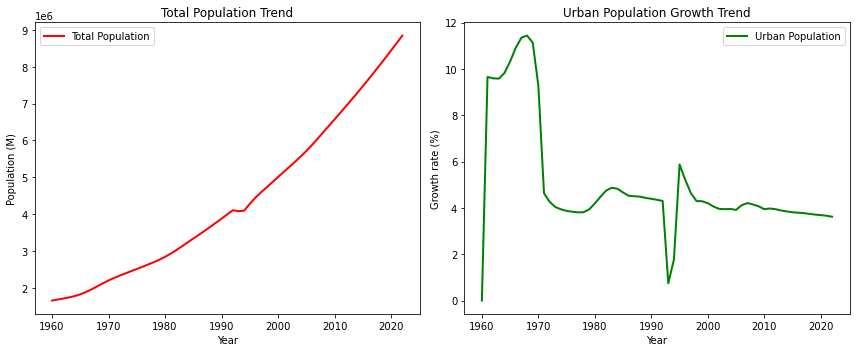

In [13]:
# Let's plot the total population and urban population growth trend over time with line charts.

# Plotting line charts side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharex=True)

# Plot Total Population
axes[0].plot(df['year'], df['Population_Total'],linewidth=2,color='red', label='Total Population')
axes[0].set_title('Total Population Trend')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Population (M)')
axes[0].legend()

# Plot Urban Population
axes[1].plot(df['year'], df['Urban_Population'], color='green',linewidth=2, label='Urban Population')
axes[1].set_title('Urban Population Growth Trend')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Growth rate (%)')
axes[1].legend()

plt.tight_layout()
plt.show()

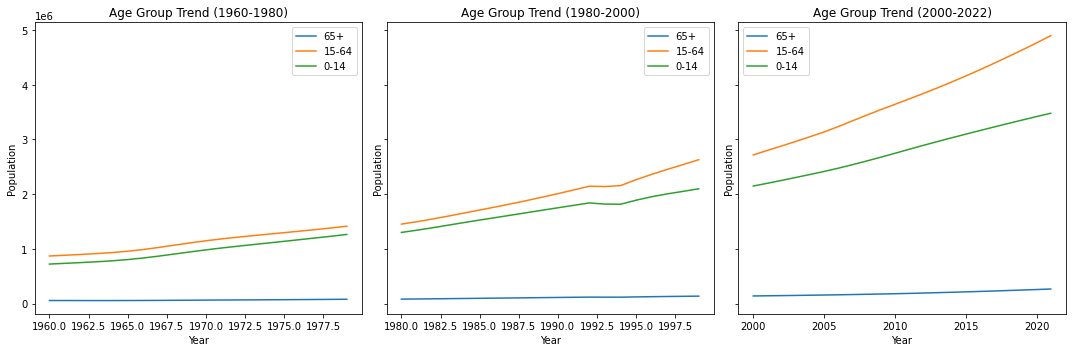

In [14]:
# How are the three age groups evolving throughout the years?

# Define period brackets
brackets = [(1960, 1980), (1980, 2000), (2000, 2022)]

# Plotting line charts side by side
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

for i, (start, end) in enumerate(brackets):
    subset = df[(df['year'] >= start) & (df['year'] < end)]
    
    axes[i].plot(subset['year'], subset['Population_65+'], label='65+')
    axes[i].plot(subset['year'], subset['Population_15-64'],  label='15-64')
    axes[i].plot(subset['year'], subset['Population_0-14'],  label='0-14')
    
    axes[i].set_title(f'Age Group Trend ({start}-{end})')
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel('Population')
    axes[i].legend()
    
plt.tight_layout()
plt.show()

**Insights 1** : The fluctuating pattern of Togo's urbanization rate, with a peak in the 1970s followed by a decline and subsequent stabilization around a 4% growth rate since 2000, suggests a complex interplay of factors influencing the country's demographic landscape. 

The stability in the proportion of the population aged 65 and above indicates a consistent aging demographic, while the substantial growth in the age group of 15 to 64 suggests a demographic dividend potential. The notable increase in the population aged 0 to 14 signifies a youthful demographic, which could pose challenges in terms of education and youth employment but also represents an opportunity for future labor force and economic growth. 

Togo should consider policies that leverage its demographic structure, investing in education and skills development for the youth while also addressing the needs of an aging population, to harness the potential demographic dividend and ensure sustainable development. 
With the right policies in place, this youthful demographic can forster poverty reduction and lead to economic success as it did in East-Asian emerging countries with what is known as the East-Asian economic "miracle".

**2.2 Health and Education Impact:**
Analyzing life expectancy trends, government spending on health and education, and literacy rates to unveils the correlation between social development and economic progress

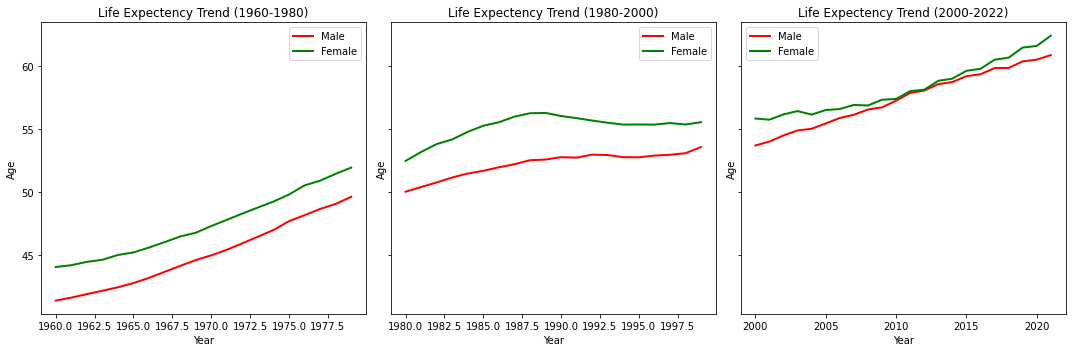

In [15]:
#let's analyze life expectency trend over the years in three different periods.

# Define period brackets
brackets = [(1960, 1980), (1980, 2000), (2000, 2022)]

# Plotting line charts side by side
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

for i, (start, end) in enumerate(brackets):
    subset = df[(df['year'] >= start) & (df['year'] < end)]
    
    axes[i].plot(subset['year'], subset['Life_Exp_male'], linewidth=2,color='red',label='Male')
    axes[i].plot(subset['year'], subset['Life_Exp_female'],linewidth=2,color='green',  label='Female')
    
    
    axes[i].set_title(f'Life Expectency Trend ({start}-{end})')
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel('Age')
    axes[i].legend()
    
plt.tight_layout()
plt.show()

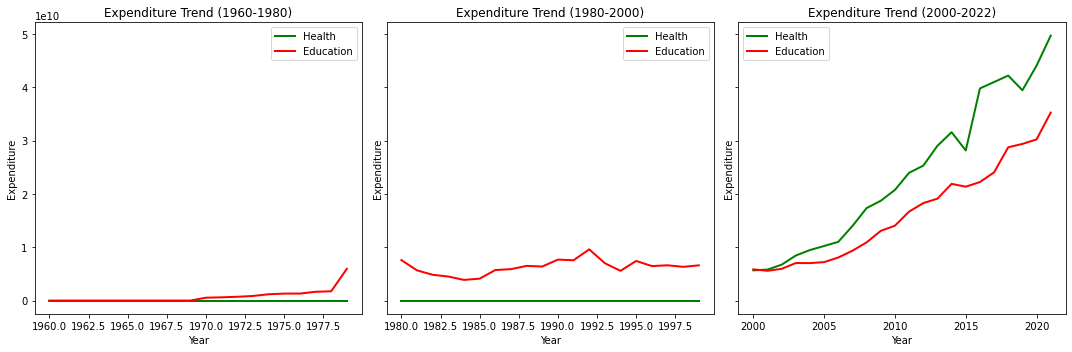

In [16]:
# We can also look at the government expenditure on health and education during the differents time brackets
# Define age brackets
brackets = [(1960, 1980), (1980, 2000), (2000, 2022)]

# Plotting line charts side by side
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

for i, (start, end) in enumerate(brackets):
    subset = df[(df['year'] >= start) & (df['year'] < end)]
    
    axes[i].plot(subset['year'], subset['Health_Expenditure'], linewidth=2,color='green',label='Health')
    axes[i].plot(subset['year'], subset['Education_Expenditure'],linewidth=2,color='red',  label='Education')
    
    axes[i].set_title(f'Expenditure Trend ({start}-{end})')
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel('Expenditure')
    axes[i].legend()
    
plt.tight_layout()
plt.show()

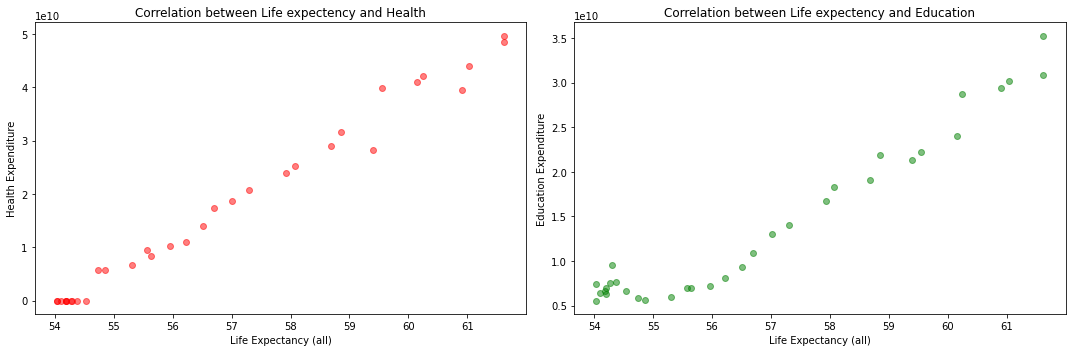

In [17]:
# How are the expenditure on health and education correlated with life expectancy?
# as we do not have data for these two variable before 1990 for expenditure,
# let's filter the DataFrame to exclude the years before 1990.
df_filtered = df[df['year'] >= 1990]

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Scatter plot for 'Life_Exp_all' and 'Health_Expenditure'
axes[0].scatter(df_filtered['Life_Exp_all'], df_filtered['Health_Expenditure'], color='red', alpha=0.5)
axes[0].set_title('Correlation between Life expectency and Health')
axes[0].set_xlabel('Life Expectancy (all)')
axes[0].set_ylabel('Health Expenditure')

# Scatter plot for 'Life_Exp_all' and 'Education_Expenditure'
axes[1].scatter(df_filtered['Life_Exp_all'], df_filtered['Education_Expenditure'], color='green',alpha=0.5)
axes[1].set_title('Correlation between Life expectency and Education')
axes[1].set_xlabel('Life Expectancy (all)')
axes[1].set_ylabel('Education Expenditure')

plt.tight_layout()
plt.show()

**Insight 2** : The trajectory of life expectancy in Togo reveals a notable correlation with the country's political stability and changes in government expenditure. The decrease in life expectancy during the early 2000s, coinciding with a period of political instability, underscores the impact of political factors on public health outcomes.

Subsequent to the establishment of a more stable political environment since 2005, life expectancy has consistently increased, indicating the positive influence of political stability on population health. The significant rise in government expenditure on health, surpassing that on education since 2005, aligns with the observed improvement in life expectancy. This suggests that increased investment in healthcare infrastructure, services, and public health initiatives has contributed to the overall well-being of the population. 

The convergence of life expectancies for men and women reflects a more equitable distribution of health benefits. Moving forward, maintaining and strategically expanding investments in both health and education will likely be crucial for sustaining and enhancing the positive trends in life expectancy in Togo. Comparisons with regional norms could further guide policy decisions to ensure alignment with broader West African health and education trends.

**2.3 Labor Force Dynamics:**
Assessing employment rates evolution in relation with political reform and policy changes provide a nuanced understanding of Togo's workforce dynamics.

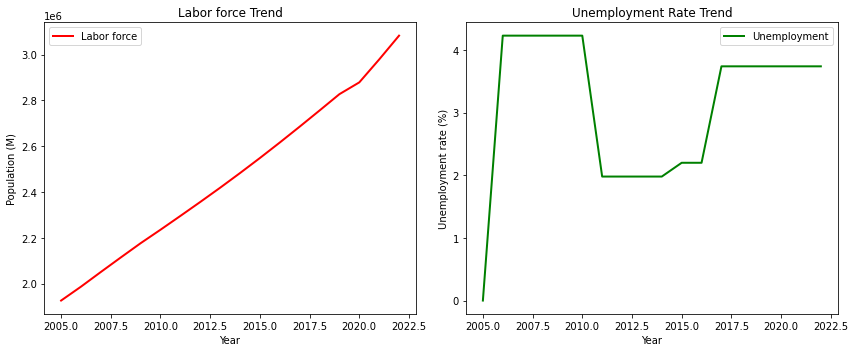

In [18]:
# Let's plot the labor force growth and unemployment rate trend over time with line charts from 2005
# as we do not have date for these two variable before 2005.

# Filter the DataFrame to exclude years before 2005
df_filtered = df[df['year'] >= 2005]

# Plotting line charts side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharex=True)

# Plot Total Population
axes[0].plot(df_filtered['year'], df_filtered['Labor_force'],linewidth=2,color='red', label='Labor force')
axes[0].set_title('Labor force Trend')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Population (M)')
axes[0].legend()

# Plot Unemployment Rate
axes[1].plot(df_filtered['year'], df_filtered['Unemployment_rate'],linewidth=2,color='green', label='Unemployment')
axes[1].set_title('Unemployment Rate Trend')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Unemployment rate (%)')
axes[1].legend()

plt.tight_layout()
plt.show()

**Insight 3** : The consistent growth in Togo's labor force from 2005 to 2022, expanding from around 2 million to over 3 million, signifies a dynamic economic environment with an increasing pool of potential workers. 

The initial decrease in unemployment around 2010 suggests positive economic developments, potentially driven by factors such as improved business conditions or government policies supporting job creation. The subsequent stability in unemployment between 2012 and 2015 indicates a period of relative economic equilibrium. However, the subsequent rise in unemployment since 2017 suggests challenges in maintaining sustained job growth, possibly influenced by economic fluctuations, changes in market demand, or other factors impacting employment opportunities.

Policymakers may need to focus on addressing the factors which can ensure a more stable labor market. 


**2.4 Economic Sector Contributions:**
Delving into GDP composition and the relative contributions of agriculture, industry, and services allows us to discern patterns in economic diversification.

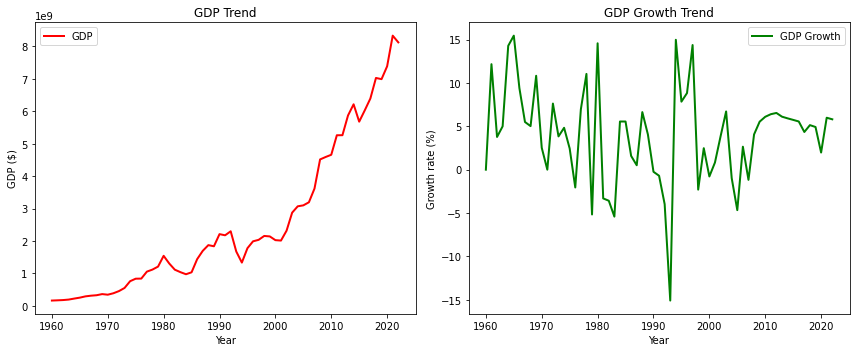

In [19]:
# We will lookup firt the GDP evolution and its growth rate variation over the period

# Plotting line charts side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharex=True)

# Plot Total Population
axes[0].plot(df['year'], df['GDP'],linewidth=2,color='red', label='GDP')
axes[0].set_title('GDP Trend')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('GDP ($)')
axes[0].legend()

# Plot Urban Population
axes[1].plot(df['year'], df['GDP_Growth'], color='green',linewidth=2, label='GDP Growth')
axes[1].set_title('GDP Growth Trend')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Growth rate (%)')
axes[1].legend()

plt.tight_layout()
plt.show()

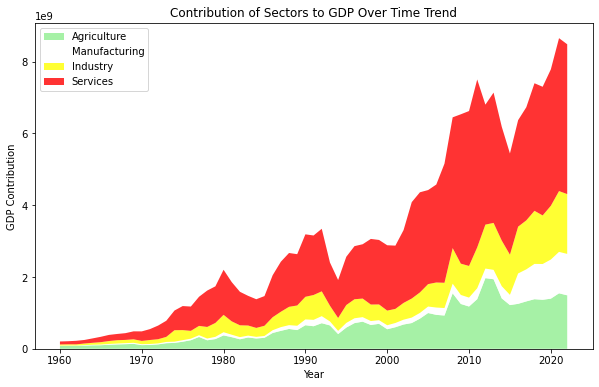

In [20]:
# What is the weight of every economic sector in Togo's GDP over the period?
# Let's illustrate this with a Stacked Area Plot

# Define colors (same as the togolese flag)
colors = ['lightgreen', 'white', 'yellow', 'red']

# Stacked Area Plot
plt.figure(figsize=(10, 6))

plt.stackplot(df['year'], df['Agriculture'], df['Manufacturing'], df['Industry'], df['Services'],
              labels=['Agriculture', 'Manufacturing', 'Industry', 'Services'], colors=colors, alpha=0.8)

plt.title('Contribution of Sectors to GDP Over Time Trend')
plt.xlabel('Year')
plt.ylabel('GDP Contribution')
plt.legend(loc='upper left')

plt.show()

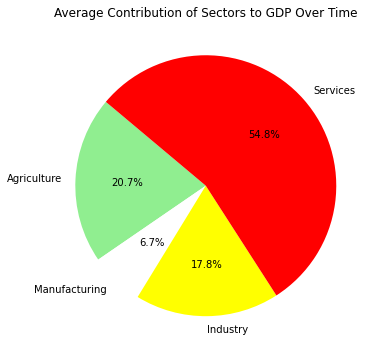

In [21]:
# On average what is the contribution of each sector to the formation of the GDP?

#let's define the colors of a pie chart to illustrate this
colors = ['lightgreen', 'white', 'yellow', 'red']

# Average contribution over time (Pie Chart)
plt.figure(figsize=(12, 6))

average_contribution = [df['Agriculture'].mean(), df['Manufacturing'].mean(),
                         df['Industry'].mean(), df['Services'].mean()]

plt.pie(average_contribution, labels=['Agriculture', 'Manufacturing', 'Industry', 'Services'],
        colors=colors, autopct='%1.1f%%', startangle=140)

plt.title('Average Contribution of Sectors to GDP Over Time')
plt.show()

**Insight 4** : The consistent increase in Togo's GDP over the years, apart from a period of relative stagnation in the nineties to early 2000 during political instability, reflects the country's overall economic resilience and potential for growth. The fluctuating GDP growth rates, with peaks in the early seventies driven by the phosphate extraction industry boom, and subsequent lows in the nineties, highlight the vulnerability of Togo's economy to external shocks and internal disruptions, particularly political instability. The more stable growth rates since around 2005, coinciding with a relatively stable political environment, suggest a positive correlation between political stability and economic performance.

The sectoral composition of Togo's GDP reveals a dominant role of the services sector, constituting 54.8%, followed by agriculture at 20.7%, industry at 17.8%, and manufacturing at 6.7%. The significant contribution of services to the GDP signals a diversified and increasingly service-oriented economy. However, the relatively low contribution of manufacturing and industry suggests potential for further industrialization and value addition to enhance economic resilience and job creation.

Policymakers may consider strategies to promote diversification, industrial growth, and enhance the overall competitiveness of Togo's economy. 

2.5 **Foreign Aid**: which countries or instutitions support Togo's economic development with their contribution? 

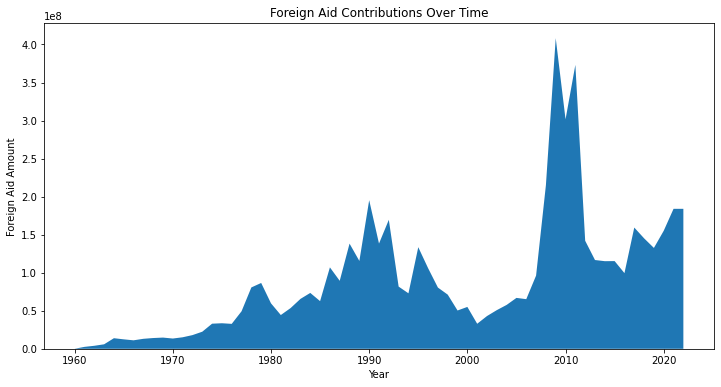

In [22]:
# let's start by looking at the overall foreign aid trend over the period with an Area Plot
plt.figure(figsize=(12, 6))

plt.stackplot(df['year'],
              df['Bilateral_Total'])

plt.title('Foreign Aid Contributions Over Time')
plt.xlabel('Year')
plt.ylabel('Foreign Aid Amount')


plt.show()

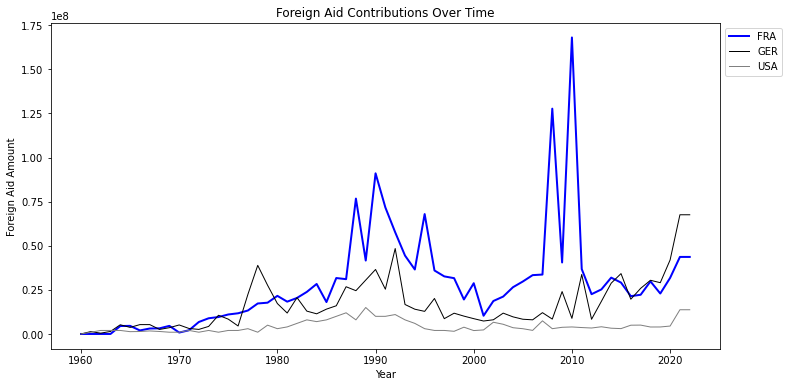

In [23]:
#Three majors countries are the priviliged bilateral partners of Togo : France, Germany and the USA
# Let's look at their contribution over time.
# Line Plot
plt.figure(figsize=(12, 6))

plt.plot(df['year'], df['Bilateral_FRA'], color='blue',linewidth=2,label='FRA')
plt.plot(df['year'], df['Bilateral_GER'], color='black',linewidth=1,label='GER')
plt.plot(df['year'], df['Bilateral_USA'], color='gray',linewidth=1,label='USA')

plt.title('Foreign Aid Contributions Over Time')
plt.xlabel('Year')
plt.ylabel('Foreign Aid Amount')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

**Insight 5** : Togo's heavy reliance on foreign aid for development underscores the significance of international partnerships in shaping its economic trajectory. The suspension of cooperation with European Economic Community countries in the early 1990s, during a period of political instability, resulted in a temporary decline in foreign aid. However, the subsequent resumption of bilateral activities and cooperation with European nations, notably France and Germany, along with contributions from the USA, led to a substantial increase in foreign aid.

The historical ties with France, as the former colonizer, and Germany, another past colonizer, highlight the enduring influence of colonial relationships on contemporary diplomatic and economic engagements. The involvement of the USA in Togo's development assistance further emphasizes the global nature of foreign aid partnerships. The sudden increase in foreign aid following the resumption of cooperation signifies the importance of stable diplomatic relations in fostering international support for Togo's development initiatives.

For sustainable development, Togo may need to diversify its sources of aid and engage in strategic partnerships with a broader array of countries and international organizations. This could enhance the country's resilience to geopolitical shifts and contribute to a more inclusive and comprehensive development agenda. Additionally, Togo should work towards establishing a transparent and accountable system for aid utilization to maximize the impact of foreign assistance on its economic and social development.

# Conclusion

                                                                                   Notebook by KEDJI Kudjo Sename